### First, we have to import all the required modules such as numpy, pandas and matplotlib: 
1. numpy for performing vector and matrix operations, 
2. pandas for data analysis
3. matplotlib for data visualization
4. FontProperties: A class for storing and manipulating font properties.

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import FormatStrFormatter as formatter

In [17]:
from matplotlib.font_manager import FontProperties as Font
font = Font()
font.set_name('Arial')
%matplotlib inline

#### Experimental data written into a file named "ph.txt" with the columns named "volume_NaOH(mL)" and "pH". The columns can be seperated by one or more spaces
1. We load this file "ph.txt' into a pandas dataframe, which is like a excel sheet

In [18]:
df_ph=pd.read_csv("ph.csv")
df_ph # printing the dataframe

,volume_NaOH(mL),pH
0,0.0,3.16
1,1.0,3.22
2,2.0,3.29
3,3.0,3.35
4,4.0,3.42
5,5.0,3.50
6,6.0,3.65
7,7.5,5.41
8,8.0,6.24
9,8.3,6.81


### Now we are ready to plot. So, we will first create a frame for plot with size 5 inches width and 5 inches height

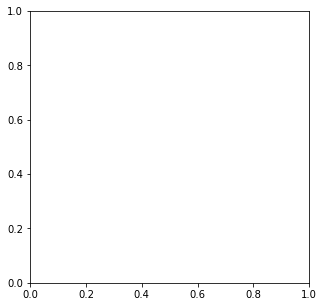

In [19]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(5,5))

### Define X and Y values before Plotting
1. Here x values represent "volume of NaOH added" and y values are "pH" values
2. Plot y versus x using ax.plot command

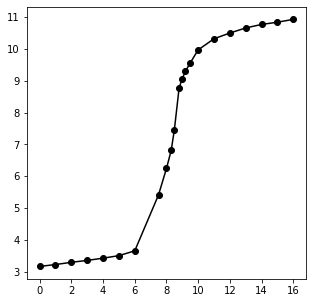

In [20]:
x=df_ph["volume_NaOH(mL)"]
y=df_ph["pH"]
ax.plot(x,y,color="black",marker="o")
fig

### Axes limits and labels
1. Define the axes limits using set_xlim and set_ylim functions
2. label the axes using set_xlabel, set_ylabel functions

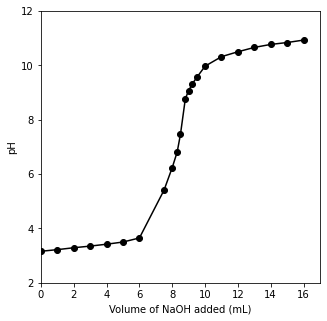

In [21]:
ax.set_xlim(0,17)
ax.set_ylim(2,12)
ax.set_xlabel('Volume of NaOH added (mL)')
ax.set_ylabel("pH")
fig

### Number Formats and Minor Tick Labels
1. Next, we want to have 1 decimal place in the X-axis values and zero decimal places in the Y-axis values. For this purpose we use formatter function.
2. We would like to have minor tick lables in the plot. For this purpose, we use set_minor_locator function.

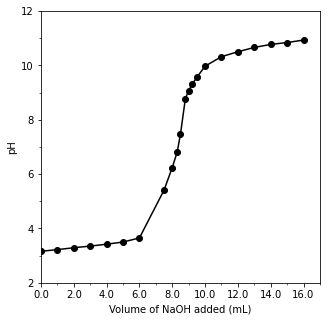

In [22]:
ax.xaxis.set_major_formatter(formatter('%.1f'))
ax.yaxis.set_major_formatter(formatter('%.0f'))

ax.xaxis.set_minor_locator(ticker.MultipleLocator(1.0))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(1.0))
fig

### Figure layout and saving

In [23]:
fig.tight_layout()
fig.savefig('pH.pdf',dpi=600)

### Now to find out end point, we would like to calculate derivative of pH with respect to volume
1. For calculating dph and dv we use np.diff() functions
2. Then we calculate dph/dv

In [28]:
dph=np.diff(y)
dv=np.diff(x)
dph_by_dv=(dph/dv).round(2)
dph_by_dv

array([0.06, 0.07, 0.06, 0.07, 0.08, 0.15, 1.17, 1.66, 1.9 , 3.25, 4.4 ,
       1.45, 1.15, 0.87, 0.82, 0.35, 0.18, 0.16, 0.11, 0.07, 0.09])

### Let us create a dataframe to store dv, dph and dph/dv values

In [29]:
df_dph=pd.DataFrame()
df_dph["volume_NaOH(mL)"]=df_ph["volume_NaOH(mL)"][1:]
df_dph["dv"]=dv
df_dph["dph"]=dph
df_dph["dph_by_dv"]=dph_by_dv
df_dph

,volume_NaOH(mL),dv,dph,dph_by_dv
1,1.0,1.0,0.06,0.06
2,2.0,1.0,0.07,0.07
3,3.0,1.0,0.06,0.06
4,4.0,1.0,0.07,0.07
5,5.0,1.0,0.08,0.08
6,6.0,1.0,0.15,0.15
7,7.5,1.5,1.76,1.17
8,8.0,0.5,0.83,1.66
9,8.3,0.3,0.57,1.90
10,8.5,0.2,0.65,3.25


### Finding the end point of the titration
1. Now, we would like to find out where dph/dv is maximum. 
2. The volume corresponding to it is the end point.

In [31]:
der_max=df_dph[df_dph["dph_by_dv"]==df_dph["dph_by_dv"].max()]
endpoint=der_max["volume_NaOH(mL)"]
endpoint=float(endpoint)
der_max
endpoint

8.8

### Finally, we calculate the conc. of HCl solution

In [32]:
v1=10 #mL change it to 20 mL if you take 20 mL HCl
# n1 is Normality of HCl
v2=endpoint #mL volume of NaOH at the end point
n2=0.1 # Normality of NaOH

n1=n2*v2/v1
conc_HCl=round(n1,2)
conc_HCl

0.09